**GROUP MEMBERS AND CONTRIBUTIONS.**

1. Kemigisha Benadine (Group Leader)- **Data Modelling**
2. Ankunda Sheila  - **Data Modelling**
3. Nabakinda Grace- **Multivariate Data Analysis and PowerPoint Development**
4. Mugabe Maate Reagan- **Data Modelling**
5. Akandinda Evelyne- **Data Cleaning and Univariate Data Analysis**
6. Kasande Rachael- **Data Modelling**
7. Nakhaima Josiah William- **Data Modelling**

## IMPORTING LIBRARIES

In [ ]:
##IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
###MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## IMPORTING THE DATASET
data=pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


##**MOTIVATION FOR SELECTING THE DATASET.**

According to the World Health Organization, non-communicable diseases (NCDs), including cardiovascular diseases (heart disease), account for approximately 36% of all deaths in Uganda (World Health Organisation, 2023).In 2021, cardiovascular diseases alone caused about 27,121 deaths, with an age-standardized mortality rate of 223 per 100,000 people (World Health Federation, 2025). These figures underscore the urgent need for robust, data-driven models that can predict heart disease risk and help intervene early in at-risk populations.

##  **BACKGROUND OF THE DATASET**
This a cleaned version of the 2015 Behavioral Risk Factor Surveillance System (BRFSS), an annual telephone survey conducted by the Centers for Disease Control and Prevention (CDC). The BRFSS collects responses on health-related behaviors and chronic conditions from hundreds of thousands of Americans. This dataset contains 253,680 rows and 22 columns.This dataset was obtained from kaggle.





## DATA DESCRIPTION


**HeartDiseaseorAttack**:	 1 if the individual has heart disease or has had a heart attack, 0 otherwise.

**HighBP**:	1 if the individual has high blood pressure, 0 otherwise.

**HighChol**:	1 if the individual has high cholesterol, 0 otherwise.

**CholCheck**:	1 if the individual has had their cholesterol checked in the last five years, 0 otherwise.

**BMI**	:Continuous feature representing Body Mass Index.

**Smoker**:	1 if the individual has smoked at least 100 cigarettes in their lifetime, 0 otherwise.

**Stroke**:	1 if the individual has a history of a stroke, 0 otherwise.

**Diabetes**:	Categorical: 0 (no diabetes), 1 (pre-diabetes), 2 (diabetes).

**PhysActivity**:	1 if the individual has engaged in physical activity in the past 30 days, 0 otherwise.

**Fruits**:	1 if the individual consumes at least one piece of fruit per day, 0 otherwise.

**Veggies**:	1 if the individual consumes at least one portion of vegetables per day, 0 otherwise.

**HvyAlcoholConsump**:	1 if the individual is a heavy alcohol consumer, 0 otherwise.

**AnyHealthcare**:	1 if the individual has any form of healthcare coverage, 0 otherwise.

**NoDocbcCost**:	1 if the individual could not see a doctor due to cost in the last 12 months, 0 otherwise.

**GenHlth**	l: General health rating from 1 (excellent) to 5 (poor).

**MentHlth**:	Continuous: Number of days in the past 30 that mental health was not good.

**PhysHlth**	: Number of days in the past 30 that physical health was not good.

**DiffWalk**:	1 if the individual has serious difficulty walking or climbing stairs, 0 otherwise.

**Sex**	0 is male, 1 is female.

**Age**	: 13 age categories ranging from 1 (18-24) to 13 (80+).

Education **bold text**	: 6 education levels from 1 (no schooling) to 6 (college graduate).

**Income**	: 8 income levels from 1 (< $10,000) to 8 (> $75,000)

## Machine Learning goal
Our  machine learning goal for this project is to build a predictive model that can accurately identify individuals with heart disease using the provided dataset

## DATA PREPROCESSING

In [ ]:
### CHECKING THE DATA TYPES
data.dtypes


,0
HeartDiseaseorAttack,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
Diabetes,float64
PhysActivity,float64
Fruits,float64


In [ ]:
## CHECKING FOR MISSING VALUES
data.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
## CHECKING FOR DUPLICATES
data.duplicated().sum()

np.int64(23899)

In [ ]:
## SHOWING THE DUPLICATED VALUES
data[data.duplicated()]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0.0,1.0,1.0,1.0,27.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0.0,1.0,1.0,1.0,33.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [ ]:
## DROPPING THE DUPLICATED ROWS
(data.drop_duplicates())


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
# --- Data Description: Descriptive Statistics ---
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
## CEHCKING FOR THE CLASS INMBALANCE
data['HeartDiseaseorAttack'].value_counts(normalize=True)

,proportion
HeartDiseaseorAttack,
0.0,0.905814
1.0,0.094186


The results show that most individuals (90.6%) do not have heart disease, while only 9.4% are affected. This imbalance implies that a naïve model could achieve high accuracy by always predicting the majority class (‘No Heart Disease’), but it would fail to correctly identify true cases. To build a more reliable model, class imbalance will be addressed during the data modeling stage

# **EXPLORATORY DATA ANALYSIS**


**UNIVARIATE DATA ANALYSIS**

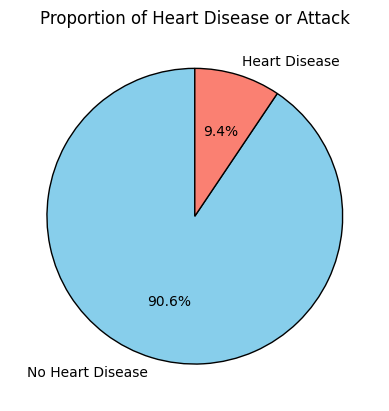

In [ ]:
# A PIE CHAT SHOWING DISTRIBUTION OF THE HEART DISEASE.
# Count values
counts = data['HeartDiseaseorAttack'].value_counts()

# Pie chart
plt.pie(
    counts,
    labels=["No Heart Disease", "Heart Disease"],
    autopct="%.1f%%",
    colors=["skyblue", "salmon"],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Proportion of Heart Disease or Attack")
plt.show()

 **Interpretation**

The pie chart shows that the majority of individuals (90.6%) do not have heart disease, while only 9.4% have heart disease. This indicates that although heart disease is less common in the population, it still represents a significant health concern that requires attention, especially considering its impact on morbidity and mortality

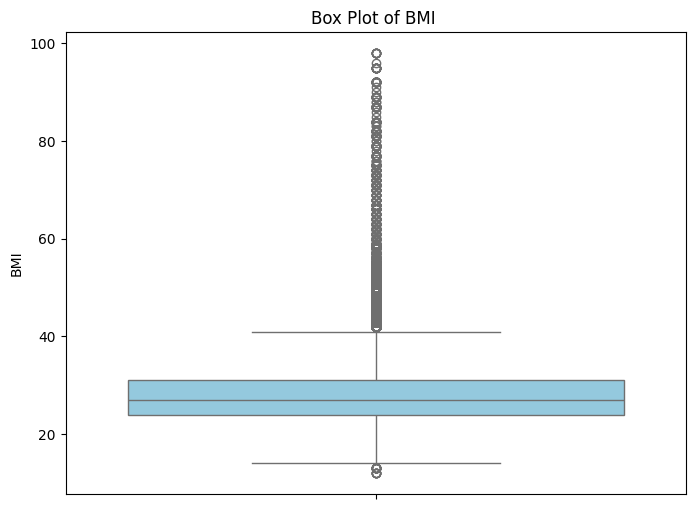

In [ ]:
# Box plot to show outliers in BMI
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BMI'], color="skyblue")
plt.ylabel("BMI")
plt.title("Box Plot of BMI ")
plt.grid(False)
plt.show()

**Interpretation.**

The BMI distribution shows a median around the mid-20s, which falls in the normal weight. It also shows that most values lie between about 20 and 35, but there are numerous high outliers extending above 40, even reaching close to 100. This indicates the presence of individuals with extreme obesity, which could significantly influence health outcomes like heart disease.



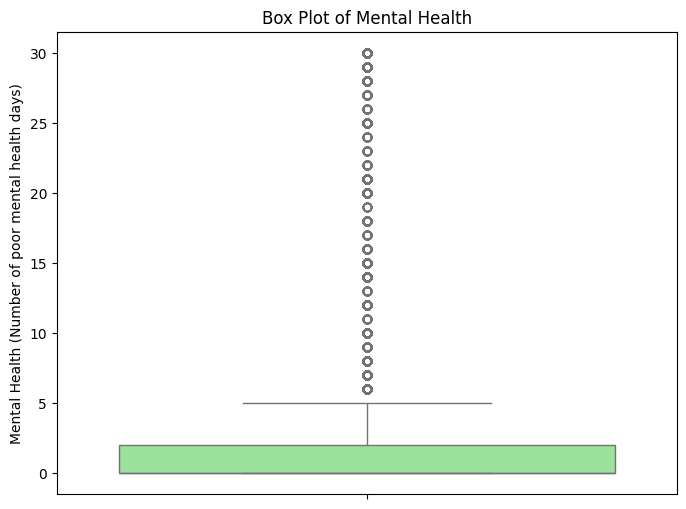

In [ ]:
# Box plot of Mental Health to Show Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MentHlth'], color="lightgreen")
plt.ylabel("Mental Health (Number of poor mental health days)")
plt.title("Box Plot of Mental Health")
plt.grid(False)
plt.show()

**Interpretation.**

A box plot above shows that the majority of individuals report very few poor mental health days (median near 0). Most people experience between 0–5 poor mental health days per month. However, there are many outliers extending up to 30 days, representing a subset of individuals struggling with persistent mental health challenges

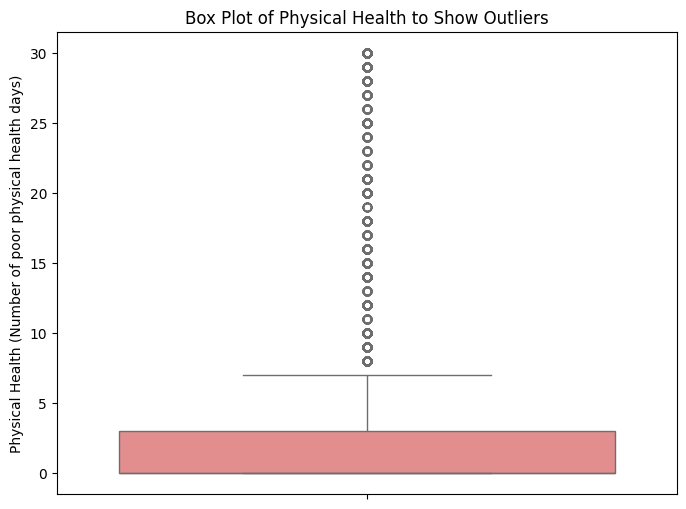

In [ ]:
# Box plot of Physical Health to Show Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['PhysHlth'], color="lightcoral")
plt.ylabel("Physical Health (Number of poor physical health days)")
plt.title("Box Plot of Physical Health to Show Outliers")
plt.grid(False)
plt.show()

**Interpretation.**

A box plot above shows that most individuals report very few poor physical health days (median near 0), though there are many outliers stretching up to 30 days. These outliers highlight individuals with chronic or severe physical health issues, which may also be linked to cardiovascular conditions(Heart Disease).

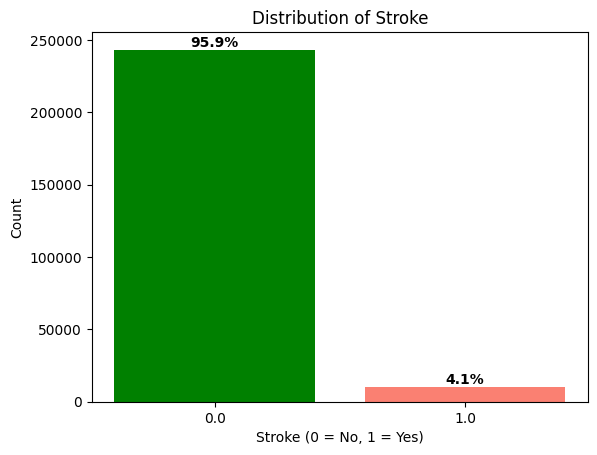

In [ ]:
# A BAR GRAPH SHOWING DISTRIBUTION OF STROKE
# Count values
counts = data['Stroke'].value_counts()

# Bar chart
bars = plt.bar(counts.index.astype(str), counts.values, color=['green', 'salmon'])
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of Stroke")

# Add percentages on top of each bar
total = counts.sum()
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.grid(False)

plt.show()


**Interpretation.**

A bar graph above shows that majority of the individuals (95.9%) do not have a stroke, while a very small percentage (4.1%) have. This highlights that while strokes are not a common occurrence in this dataset, they still affect a notable portion of the population.

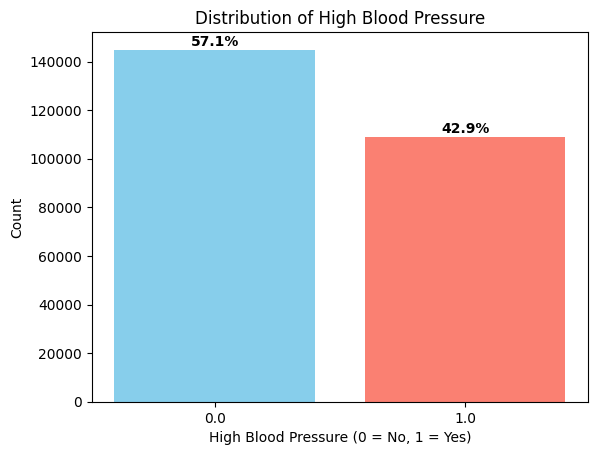

In [ ]:
# A BAR GRAPH SHOWING DISTRIBUTION OF HIGH BLOOD PRESSURE.
# Count values
counts = data['HighBP'].value_counts()

# Bar chart
bars = plt.bar(counts.index.astype(str), counts.values, color=['skyblue', 'salmon'])
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of High Blood Pressure")

# Add percentages on top of each bar
total = counts.sum()
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.grid(False)

plt.show()

**Interpretation.**

A bar graph above shows that almost a half of the individuals (57.1%), do not have high blood pressure, while a substantial portion (42.9%) do. This implies that a large segment of the population is at risk for serious health complications like heart disease and stroke.

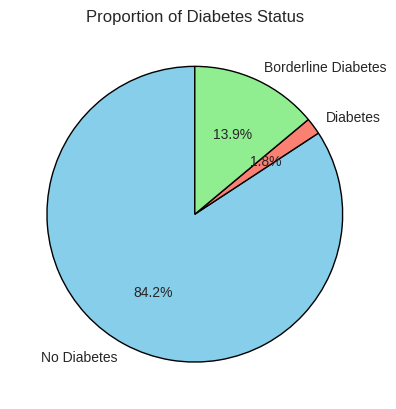

In [ ]:
# A PIE CHAT SHOWING PROPORTION OF DIABETES STATUS
# Count values
counts = data['Diabetes'].value_counts().sort_index()

# Define labels
labels = ["No Diabetes", "Diabetes", "Borderline Diabetes"]

# Pie chart
plt.pie(
    counts,
    labels=labels,
    autopct="%.1f%%",
    colors=["skyblue", "salmon", "lightgreen"],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Proportion of Diabetes Status")
plt.show()

**Interpretation**

The pie chart above shows that the majority of the individuals (83.7%) do not have diabetes, which is a positive indicator of overall health. However, the data also reveals that 16.3% of individuals are either prediabetic (4.7%) or diabetic (11.6%). This implies that while diabetes is not the predominant condition, this significant proportion highlights a need for public health interventions focused on early screening, lifestyle modification, and preventative care among others to prevent progression from prediabetes to diabetes.




# **MULTIVARIATE DATA ANALYISIS**

**Distribution of Heart Disease (Target) against all the features in the Dataset.**

/tmp/ipython-input-688406350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=feature, data=df_plot, ax=ax, palette='viridis')
/tmp/ipython-input-688406350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=feature, data=df_plot, ax=ax, palette='viridis')
/tmp/ipython-input-688406350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=feature, data=df_plot, ax=ax, palette='viridis')


Subplots saved to 'heart_disease_subplots_no_grid.png'


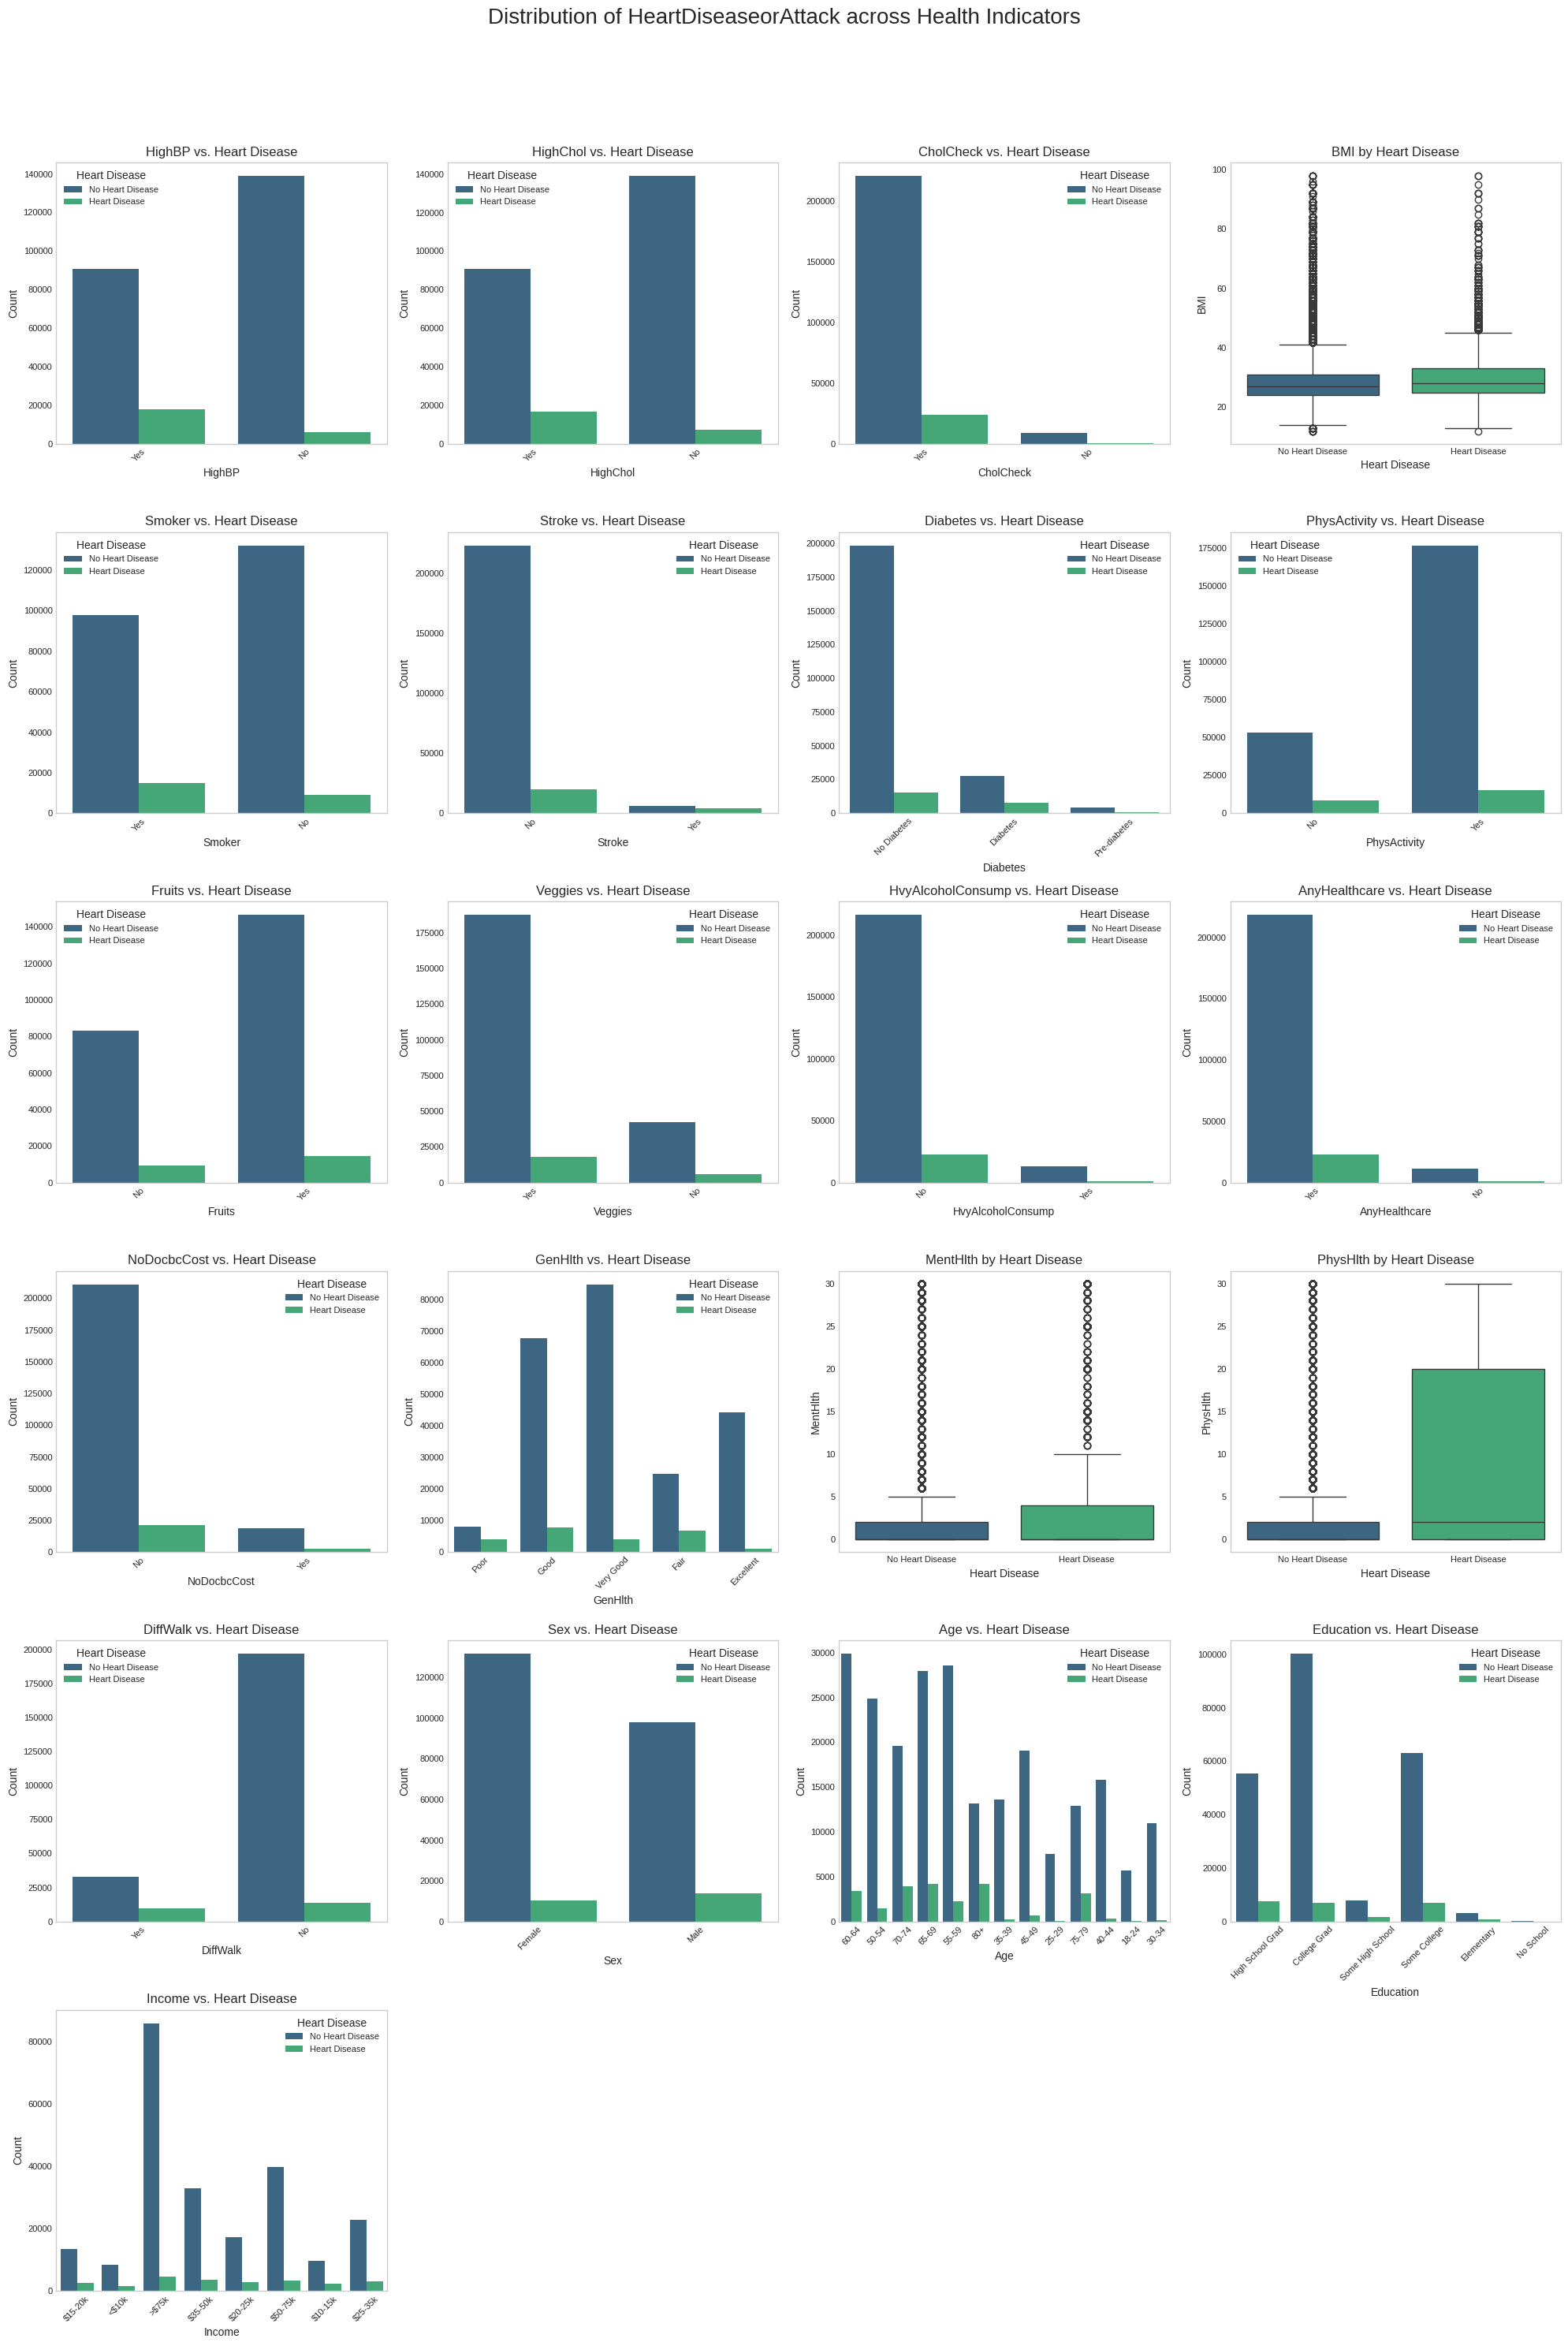

In [ ]:
# Define the target variable
target_variable = 'HeartDiseaseorAttack'

# Get the list of all other variables
feature_variables = data.columns.drop(target_variable)

# Set up the plotting environment
num_plots = len(feature_variables)
num_cols = 4  # Adjust number of columns as needed
num_rows = (num_plots + num_cols - 1) // num_cols # Calculate number of rows

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), dpi=100)
fig.suptitle(f'Distribution of {target_variable} across Health Indicators', fontsize=20, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Map target variable for clearer plotting
df_plot = data.copy()
df_plot[target_variable] = df_plot[target_variable].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# Iterate through each feature and create a plot
for i, feature in enumerate(feature_variables):
    ax = axes[i]
    ax.grid(False) # Remove gridlines

    # Use box plot for continuous-like variables with many unique values
    if feature in ['BMI', 'MentHlth', 'PhysHlth']:
        sns.boxplot(x=target_variable, y=feature, data=df_plot, ax=ax, palette='viridis')
        ax.set_title(f'{feature} by Heart Disease', fontsize=12)
        ax.set_xlabel('Heart Disease', fontsize=10)
        ax.set_ylabel(feature, fontsize=10)
        ax.tick_params(axis='x', rotation=0, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

    # Check the data type of the feature for categorical plots
    elif data[feature].nunique() <= 10 or feature in ['Age', 'Education', 'Income']:  # Treat as categorical
        # Create a dictionary to map numerical values to meaningful labels
        if feature == 'Sex':
            labels = {0: 'Female', 1: 'Male'}
        elif feature in ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']:
            labels = {0: 'No', 1: 'Yes'}
        elif feature == 'Diabetes':
            labels = {0: 'No Diabetes', 1: 'Pre-diabetes', 2: 'Diabetes'}
        elif feature == 'Education':
            labels = {1: 'No School', 2: 'Elementary', 3: 'Some High School', 4: 'High School Grad', 5: 'Some College', 6: 'College Grad'}
        elif feature == 'Income':
            labels = {1: '<$10k', 2: '$10-15k', 3: '$15-20k', 4: '$20-25k', 5: '$25-35k', 6: '$35-50k', 7: '$50-75k', 8: '>$75k'}
        elif feature == 'GenHlth':
            labels = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
        elif feature == 'Age':
            labels = {1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 11: '70-74', 12: '75-79', 13: '80+'}
        else:
            labels = None

        if labels:
            df_plot[feature] = df_plot[feature].map(labels)

        sns.countplot(x=feature, hue=target_variable, data=df_plot, ax=ax, palette='viridis')
        ax.set_title(f'{feature} vs. Heart Disease', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.legend(title='Heart Disease', fontsize=8)

    else:
        # Fallback to histplot for any other unexpected continuous variables
        sns.histplot(x=feature, hue=target_variable, data=df_plot, ax=ax, palette='viridis', kde=True, multiple="stack")
        ax.set_title(f'{feature} by Heart Disease', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.legend(title='Heart Disease', fontsize=8)


# Remove any unused subplots
for i in range(len(feature_variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('heart_disease_subplots_no_grid.png')


print("Subplots saved to 'heart_disease_subplots_no_grid.png'")

**Interpretations of Subplots**

1.	**High Blood Pressure vs. Heart Disease.**

The bar graph shows that Individuals with high blood pressure are much more likely to have heart disease compared to those without. The majority of heart disease cases are concentrated in the high blood pressure group, confirming hypertension as a strong risk factor.

2.	**High cholesterol vs. Heart Disease**

The bar graph shows that heart disease is more prevalent among individuals with high cholesterol levels compared to those with normal cholesterol, indicating that elevated cholesterol is a major contributor to heart diseases.


3.	**Cholesterol Checked vs. Heart Disease**

The bar graph shows that most individuals, both with and without heart disease, reported having undergone cholesterol checks. This indicates that while cholesterol checks are common, they alone do not prevent heart disease, but they serve as an important screening measure.

4.	**Body Mass Index by Heart Disease**

The box plot shows that Individuals with heart disease generally show slightly higher median BMI values compared to those without, with a wider spread and more extreme outliers. This indicates that obesity and overweight status may contribute to heart disease risk.

5.	**Smoker vs. Heart Disease**

The bar graph shows that heart disease is more prevalent among smokers compared to non-smokers. This indicates that smoking is a risk factor associated with heart disease.

6.	**Stroke vs. Heart Disease**

A bar graph shows that there is a strong connection between individuals who have had a stroke and those with heart disease. This indicates shared underlying risk factors and comorbidity between stroke and heart disease.


7.	**Diabetes vs. Heart Disease**

The bar graph shows that Heart disease is more common among individuals with diabetes than those without which indicates that diabetes is a risk factor associated with heart disease

8.	** Physical activity vs. Heart Disease**

A bar graph shows that individuals without heart disease report higher levels of physical activity compared to those with heart disease. This indicates that physical activity may offer protective benefits against cardiovascular conditions.

9.	**Fruits vs. Heart Disease**

The bar graph also shows that Fruit consumption appears slightly more common among individuals without heart disease compared to those with it, implying that diet may play a protective role against heart diseases.


10.	**Vegetable vs. Heart Disease**

Similar to fruit consumption, the bar graph shows that vegetable intake is higher in those without heart disease, suggesting that a healthy diet rich in vegetables is associated with lower cardiovascular risk.

11.	**Heavy alcohol consumption vs. Heart Disease**

Heavy alcohol consumption is not common among individuals without heart disease, though those with the condition are also represented. This suggests that heavy alcohol may not be the strongest independent risk factor in this dataset.

12.	**Any Health care vs. Heart Disease**

The graph shows that most individuals, regardless of heart disease status, report having access to healthcare which indicates that access alone does not prevent heart disease, pointing to the importance of healthcare quality and preventive measures.

13.	**NoDocbcCost vs. Heart Disease**

The bar graph shows that cost-related barriers to healthcare are reported by both groups, but those without heart disease are more represented which indicated that lack of healthcare access due to cost is not directly associated with higher heart disease prevalence in this dataset.

14.	**General Health vs. Heart Disease**

The bar graph shows that individuals without heart disease, often rate their general health as “good,” “very good,” or “excellent.” Whereas those with heart disease, are more likely to rate their general health as “poor” or “fair,” which indicates general health associated with heart disease.

15. **Mental Health by Heart Disease**

The box plot shows that Heart disease patients report a slightly higher spread in the number of poor mental health days compared to those without heart disease. This indicates a potential link between mental health and cardiovascular conditions.

16.	**Physical Health by Heart Disease**

The box plot show that those with heart disease report more poor physical health days per month compared to those without, indicating that heart disease substantially affects overall physical wellbeing.

17.	**Difficulty walking vs. Heart Disease**

The bar graph shows that difficulty walking is much more prevalent among individuals with heart disease than those without, indicating that heart disease affects overall mobility, physical functioning, and quality of life.

18.	**Sex vs. Heart Disease**

The bar graph shows that heart disease is slightly more common among males compared to females in this dataset, reflecting known gender differences in cardiovascular risk.

19.	**Age vs. Heart Disease**

The bar graph show that the prevalence of heart disease increases steadily with age, with older adults (especially those above 55) showing much higher counts than younger individuals. This indicates that Age is a major non-modifiable risk factor that significantly contributes to the likelihood of developing heart disease

20.	**Education vs. Heart Disease**

The bar graph shows that the majority of individuals with higher education levels reported no heart disease; however, a portion of them still reported having the condition. This implies that while education may be associated with healthier lifestyle choices and better health awareness, it alone cannot fully prevent heart disease, as other risk factors also play a significant role.


21.	**Income vs. Heart Disease**

Lastly, the bar graph shows that the majority of individuals with higher income (>75K, 60-70K,) reported no heart disease; however, a portion of them still reported having the condition. This implies that while high income levels may be associated with healthier lifestyle choices, it alone cannot fully prevent heart disease, as other risk factors also play a significant role.


 **Correlation Heatmap**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

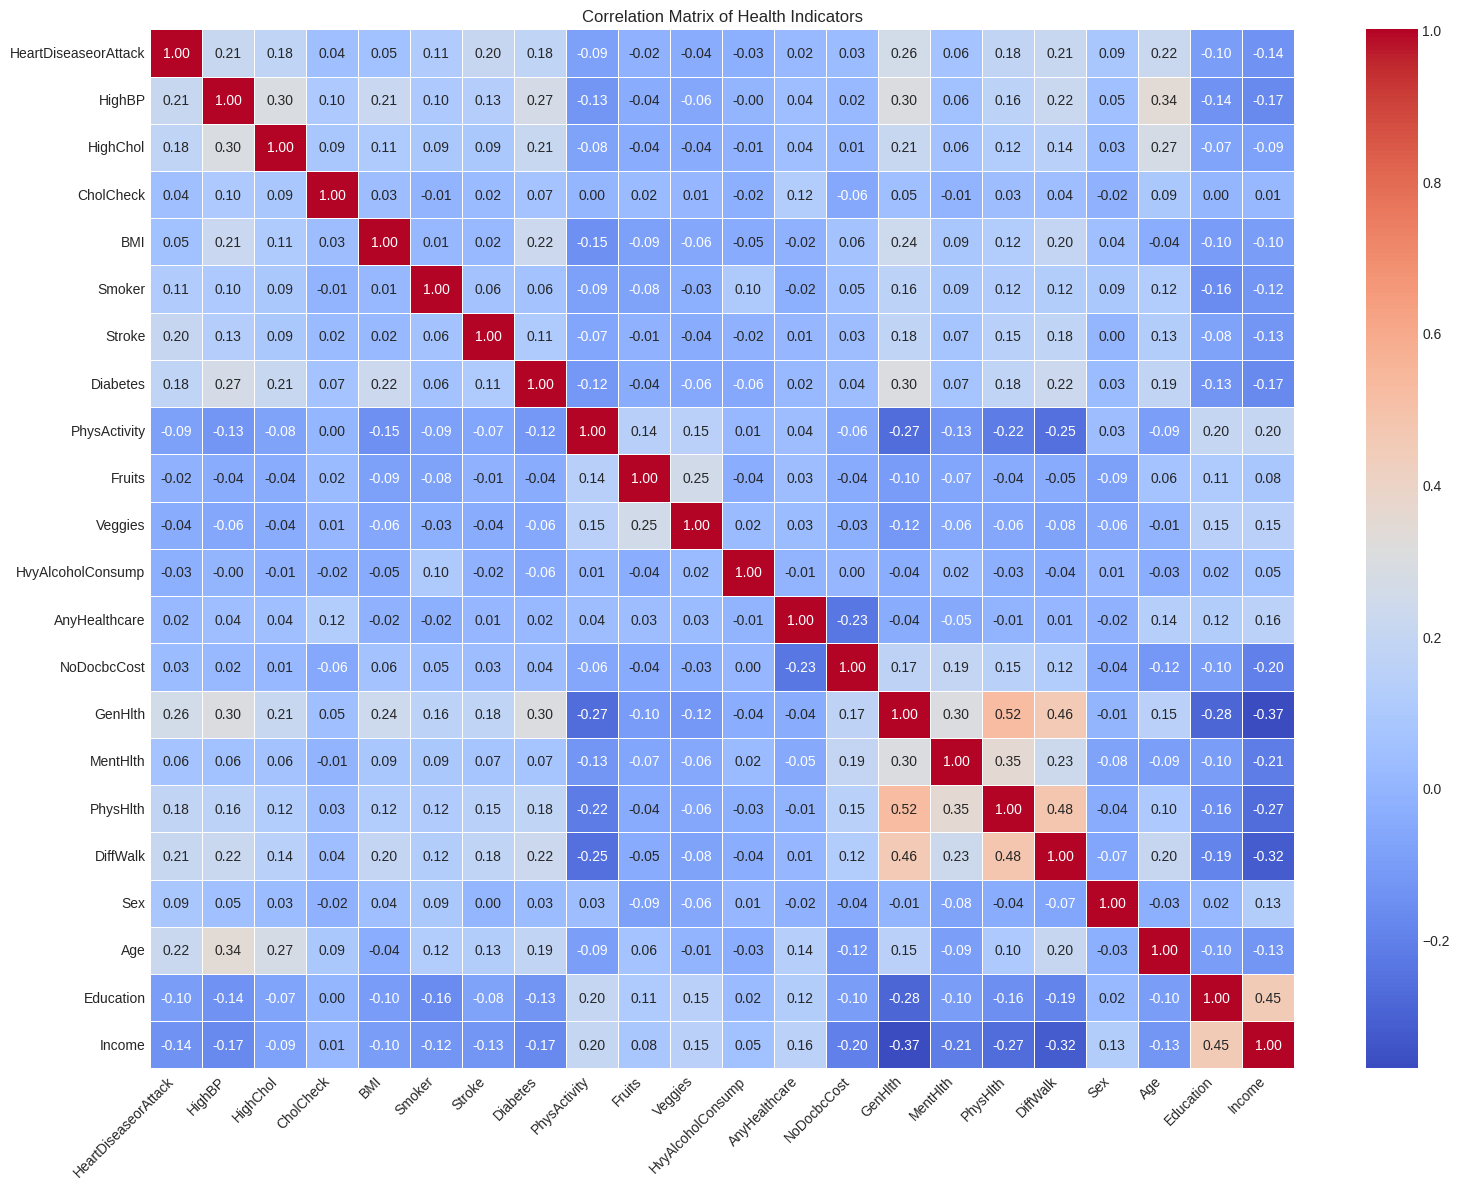

In [ ]:
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Health Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

**Interpretation.**

The correlation heatmap indicates that most features have very low linear correlations with each other as reflected by the off-diagonal values. For example, it shows a moderate positive correlation between physical health and mental health (0.52), and weak positive correlations of difficulty in walking with physical health (0.48) and general health (0.46), education and income level (0.45) among others. This indicates low multicollinearity in the dataset, which is beneficial for machine learning model, as it reduces the risk of redundant predictors causing instability or inflated variance in model estimates

# **DATA MODELLING**

In [ ]:
## Defining the Target and features
x=data.drop('HeartDiseaseorAttack',axis=1)
y=data['HeartDiseaseorAttack']
print(x.shape)
print(y.shape)


(253680, 21)
(253680,)


In [ ]:
## Spliiting the data into training,validation and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(177576, 21)
(38052, 21)
(38052, 21)


##**1. USING LOGISTIC REGRESSION  MODELLING**


**Logistic Regression :**

Logistic Regression is a statistical model used for binary classification. It predicts the probability that a given input belongs to a particular class. It does this by using a logistic function (sigmoid function) to map the output of a linear equation to a value between 0 and 1. This value can then be interpreted as a probability. If the probability is above a certain threshold (usually 0.5), the model predicts the positive class; otherwise, it predicts the negative class.

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     34468
         1.0       0.25      0.79      0.38      3584

    accuracy                           0.75     38052
   macro avg       0.61      0.77      0.61     38052
weighted avg       0.90      0.75      0.80     38052



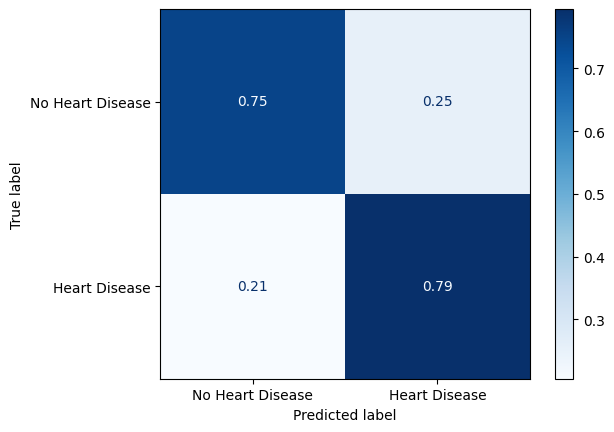

In [ ]:
# Creating a pipleline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(class_weight='balanced'))
])

# Fitting the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predictiing  on the test data
predicted = pipeline .predict(x_test)
## printing the claaifctaion repoert
print(classification_report(y_test, predicted))
# showing the confusion matrix,normalised
ConfusionMatrixDisplay.from_predictions(y_test, predicted, cmap='Blues', normalize='true', display_labels=['No Heart Disease', 'Heart Disease'])
plt.show()

 **Summary of Logistic Regression Model Performance**:


**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.97. This means that when the model predicts a person does *not* have heart disease, it is correct 97% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.25. This means that when the model predicts a person *does* have heart disease, it is correct only 25% of the time. This is quite low and indicates that many of the instances predicted as heart disease are actually not.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.75. This means the model correctly identifies 75% of all individuals who do *not* have heart disease.
    *   **For Class 1.0 (Heart Disease):** 0.79. This means the model correctly identifies 79% of all individuals who *do* have heart disease. This is a good recall score for the positive class, which is important in medical diagnosis to avoid missing actual cases of heart disease.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.75. This means 75% of individuals who *do not* have heart disease were correctly predicted as not having heart disease.
*   **False Positive (Top-Right):** 0.25. This means 25% of individuals who *do not* have heart disease were incorrectly predicted as having heart disease (Type I error).
*   **False Negative (Bottom-Left):** 0.21. This means 21% of individuals who *do* have heart disease were incorrectly predicted as not having heart disease (Type II error). This is a critical metric in this context, as missing a heart disease case can have serious consequences.
*   **True Positive (Bottom-Right):** 0.79. This means 79% of individuals who *do* have heart disease were correctly predicted as having heart disease. This aligns with the recall score for Class 1.0.

*   **Key Strengths:**
    *   **High Recall for Heart Disease (0.79):** The model is good at identifying most individuals who actually have heart disease, minimizing the risk of missing true positive cases (false negatives).
*   **Key Weaknesses:**
    *   **Low Precision for Heart Disease (0.25):** When the model predicts heart disease, it is often incorrect, leading to a high number of false positives (predicting heart disease when it's not present).

**In summary:** The model is effective at identifying individuals who are likely to have heart disease , but it also flags many individuals as having heart disease who do not . This suggests that while it's a good screening tool to catch potential cases, further investigation would be needed for positive predictions.

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     34468
         1.0       0.25      0.79      0.38      3584

    accuracy                           0.75     38052
   macro avg       0.61      0.77      0.61     38052
weighted avg       0.90      0.75      0.80     38052



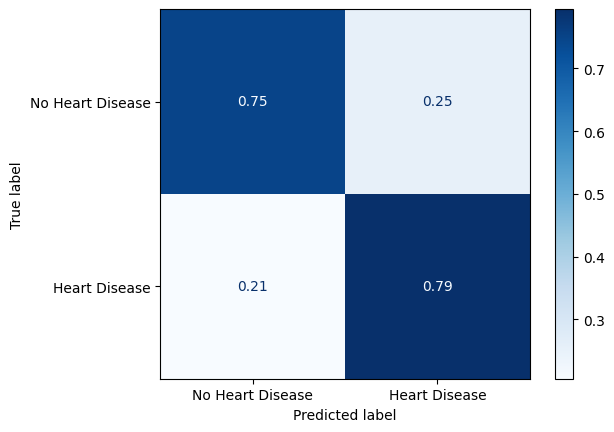

In [ ]:
## APPLYING HYPER PARAMTER TUNING,TO IMPROVE THE MODEL
# Creating a pipeline
pipeline_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(class_weight='balanced'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logistic_regression__solver': ['liblinear', 'lbfgs'] # Solvers to try
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline_tuned, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data (using the validation set implicitly in the cross-validation)
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
# Predict on the test data using the best model
y_pred_best = best_model.predict(x_test)
## printing the claaifctaion repoert
print(classification_report(y_test, y_pred_best))
# showing te confusion matrix,normalised
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues', normalize='true', display_labels=['No Heart Disease', 'Heart Disease'])
plt.show()





**Conclusion:**

Based on these results, the hyperparameter tuning performed with the chosen parameter grid did not lead to an improvement in the Logistic Regression model's ability to predict heart disease. T

## 2. USING THE RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     34468
         1.0       0.39      0.10      0.16      3584

    accuracy                           0.90     38052
   macro avg       0.65      0.54      0.55     38052
weighted avg       0.86      0.90      0.87     38052



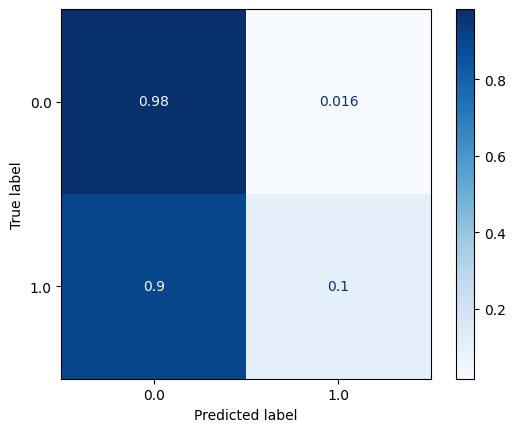

In [ ]:
# Creating a pipeline with StandardScaler and RandomForestClassifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=42, class_weight='balanced')) # Using balanced class weight to cater for the class imbalance
])

# Fitting the pipeline to the training data
pipeline_rf.fit(x_train, y_train)

# Predicting on the test data
y_pred_rf = pipeline_rf.predict(x_test)
##printing the classification report
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix for the Random Forest pipeline
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues', normalize='true')
plt.show()

### Interpretation of Random Forest Classifier Performance:

**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.91. When the model predicts no heart disease, it is correct 91% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.39. When the model predicts heart disease, it is correct 39% of the time. This is higher than the Logistic Regression model's precision for this class (0.25), indicating fewer false positives.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.98. The model correctly identifies 98% of all individuals who do *not* have heart disease. This is very high.
    *   **For Class 1.0 (Heart Disease):** 0.10. The model correctly identifies only 10% of all individuals who *do* have heart disease. This is significantly lower than the Logistic Regression model's recall for this class (0.79) and is a major weakness of this model.
*   **F1-Score:**
    *   **For Class 0.0 (No Heart Disease):** 0.95. A high F1-score for the majority class.
    *   **For Class 1.0 (Heart Disease):** 0.16. A very low F1-score for the minority class, primarily due to the low recall.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.98. This means 98% of individuals who *do not* have heart disease were correctly predicted as not having heart disease. This is very good at identifying true negatives.
*   **False Positive (Top-Right):** 0.016. This means a very small proportion (1.6%) of individuals who *do not* have heart disease were incorrectly predicted as having heart disease (Type I error). This is a significant improvement in reducing false positives compared to the Logistic Regression model.
*   **False Negative (Bottom-Left):** 0.9. This means a large proportion (90%) of individuals who *do* have heart disease were incorrectly predicted as not having heart disease (Type II error). This is a critical issue, as it means the model is missing a high percentage of actual heart disease cases.
*   **True Positive (Bottom-Right):** 0.1. This means only 10% of individuals who *do* have heart disease were correctly predicted as having heart disease. This aligns with the recall score for Class 1.0.

**Comparison to Logistic Regression:**

*   **Precision for Heart Disease:** Random Forest (0.39) is better than Logistic Regression (0.25). This means when the Random Forest predicts heart disease, it is more likely to be correct.
*   **Recall for Heart Disease:** Random Forest (0.10) is significantly worse than Logistic Regression (0.79). This means the Random Forest misses a much higher proportion of actual heart disease cases.
*   **False Positives:** Random Forest has a much lower rate of false positives (0.016) compared to Logistic Regression (0.25).
*   **False Negatives:** Random Forest has a much higher rate of false negatives (0.9) compared to Logistic Regression (0.21).

**Conclusion:**

The Random Forest Classifier excels at correctly identifying individuals who do *not* have heart disease and significantly reduces false positives compared to Logistic Regression. However, its major drawback is its very low recall for the Heart Disease class, meaning it fails to identify a large percentage of individuals who actually have heart disease,which is our goal.

In a medical context, a high false negative rate for a serious condition like heart disease is generally undesirable. While the Random Forest model is better at being correct when it predicts heart disease (higher precision), it is much worse at finding all the cases of heart disease (low recall).

Since our goal is  to  minimise as many false negatives as possible,the Logistic Regression model is better with its higher recall for the positive class,despite its lower precision



              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     34468
         1.0       0.25      0.79      0.37      3584

    accuracy                           0.75     38052
   macro avg       0.61      0.77      0.61     38052
weighted avg       0.90      0.75      0.80     38052



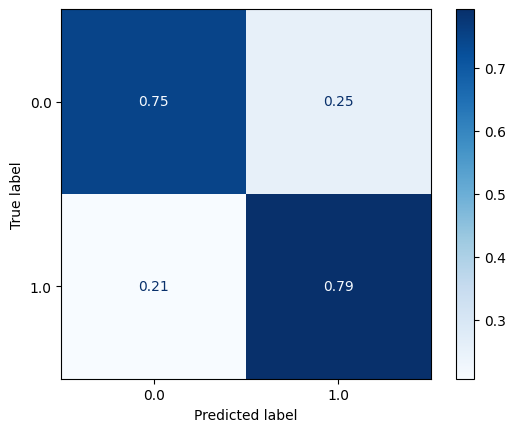

In [ ]:
## IMPROVING THE MODEL WITH HYPPERPARAMTER TUNING( SOURCE AI)
# Creating a pipeline with StandardScaler and RandomForestClassifier
pipeline_rf_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Defining the parameter grid for GridSearchCV
# Reduced parameters for quicker execution, can be expanded
param_grid_rf = {
    'random_forest__n_estimators': [100, 200], # Number of trees in the forest
    'random_forest__max_depth': [10, 20],     # Maximum depth of the trees
    'random_forest__min_samples_split': [2, 5] # Minimum number of samples required to split an internal node
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(pipeline_rf_tuned, param_grid_rf, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(x_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data using the best model
y_pred_best_rf = best_rf_model.predict(x_test)
##printing the classification report
print(classification_report(y_test, y_pred_best_rf))
# Display the confusion matrix for the best Random Forest model on the test set
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_rf, cmap='Blues', normalize='true')
plt.show()

### Interpretation of Tuned Random Forest Classifier Performance:

The results after applying hyperparameter tuning to the Random Forest Classifier show a change in the model's performance compared to the initial Random Forest model.

**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.97. When the model predicts no heart disease, it is correct 97% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.25. When the model predicts heart disease, it is correct 25% of the time.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.75. The model correctly identifies 75% of all individuals who do *not* have heart disease.
    *   **For Class 1.0 (Heart Disease):** 0.79. The model correctly identifies 79% of all individuals who *do* have heart disease.
*   **F1-Score:**
    *   **For Class 0.0 (No Heart Disease):** 0.84.
    *   **For Class 1.0 (Heart Disease):** 0.37.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.75.
*   **False Positive (Top-Right):** 0.25.
*   **False Negative (Bottom-Left):** 0.21.
*   **True Positive (Bottom-Right):** 0.79.

**Comparison to the Random Forest without Hyperparameter Tuning:**

Comparing these results to the Random Forest model *without* hyperparameter tuning

*   **Precision for Class 0.0:** Increased from 0.91 to 0.97.
*   **Precision for Class 1.0:** Decreased from 0.39 to 0.25.
*   **Recall for Class 0.0:** Decreased from 0.98 to 0.75.
*   **Recall for Class 1.0:** Increased from 0.10 to 0.79.
*   **F1-Score for Class 0.0:** Decreased from 0.95 to 0.84.
*   **F1-Score for Class 1.0:** Increased from 0.16 to 0.37.
*   **Accuracy:** Decreased from 0.90 to 0.75.
*   **False Positives:** Increased from 0.016 to 0.25.
*   **False Negatives:** Decreased from 0.9 to 0.21.
*   **True Negatives:** Decreased from 0.98 to 0.75.
*   **True Positives:** Increased from 0.1 to 0.79.

**Conclusion:**

The tuned model is now much better at its most important task: identifying true cases of heart disease. It correctly identifies 79% of all positive cases, significantly reducing the number of missed diagnoses (false negatives). This comes at the expected trade-off of decreased precision and a higher number of false alarms (false positives). The results of the tuned Random Forest model are very similar to your Logistic Regression model,  that both models  have a highly effective performance profile.



## 3. USING THE DECISION TREE CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     34468
         1.0       0.25      0.25      0.25      3584

    accuracy                           0.86     38052
   macro avg       0.58      0.59      0.59     38052
weighted avg       0.86      0.86      0.86     38052



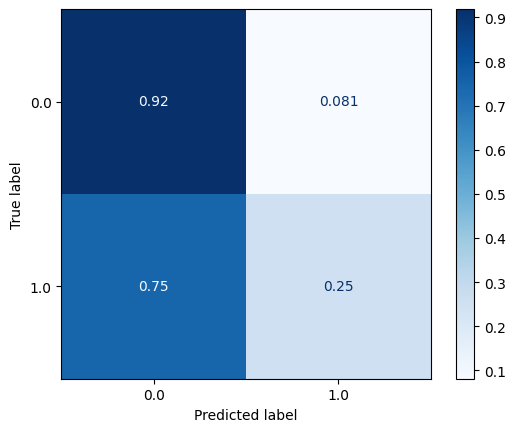

In [ ]:
# Creating a pipeline with StandardScaler and DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Fitting the pipeline to the training data
pipeline_dt.fit(x_train, y_train)

# Predicting on the test data
y_pred_dt = pipeline_dt.predict(x_test)

# printinng the classifcation report
print(classification_report(y_test, y_pred_dt))
# Display the confusion matrix for the Decision Tree model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues', normalize='true')
plt.show()

### Interpretation of Decision Tree Classifier Performance:

**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.92. When the model predicts no heart disease, it is correct 92% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.25. When the model predicts heart disease, it is correct 25% of the time. This precision is similar to the Logistic Regression and tuned Random Forest models.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.92. The model correctly identifies 92% of all individuals who do *not* have heart disease.
    *   **For Class 1.0 (Heart Disease):** 0.25. The model correctly identifies only 25% of all individuals who *do* have heart disease. This recall for the positive class is significantly lower than both the Logistic Regression (0.79) and the tuned Random Forest (0.79) models, and only slightly better than the untuned Random Forest (0.10).
*   **F1-Score:**
    *   **For Class 0.0 (No Heart Disease):** 0.92.
    *   **For Class 1.0 (Heart Disease):** 0.25. The low F1-score for the positive class is primarily due to the low recall.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.92. This means 92% of individuals who *do not* have heart disease were correctly predicted as not having heart disease.
*   **False Positive (Top-Right):** 0.081. This means about 8.1% of individuals who *do not* have heart disease were incorrectly predicted as having heart disease (Type I error). This is lower than the Logistic Regression and tuned Random Forest models (both 0.25), but higher than the untuned Random Forest (0.016).
*   **False Negative (Bottom-Left):** 0.75. This means 75% of individuals who *do* have heart disease were incorrectly predicted as not having heart disease (Type II error). This is a very high false negative rate, worse than Logistic Regression and tuned Random Forest (both 0.21), but better than the untuned Random Forest (0.9).
*   **True Positive (Bottom-Right):** 0.25. This means only 25% of individuals who *do* have heart disease were correctly predicted as having heart disease. This aligns with the recall score for Class 1.0.

**Comparison to Other Models:**

*   **Precision for Heart Disease (Class 1.0):** Similar to Logistic Regression and tuned Random Forest (around 0.25), but lower than untuned Random Forest (0.39).
*   **Recall for Heart Disease (Class 1.0):** Significantly lower than Logistic Regression and tuned Random Forest (0.79), but higher than untuned Random Forest (0.10).
*   **False Positives:** Lower than Logistic Regression and tuned Random Forest, but higher than untuned Random Forest.
*   **False Negatives:** Higher than Logistic Regression and tuned Random Forest, but lower than untuned Random Forest.

**Conclusion:**

The Decision Tree Classifier is not the ideal model for this medical screening task. While it provides a balance between false positives and false negatives, it fails at the most critical job: identifying individuals with heart disease. Its high false negative rate of 75% means it misses a large proportion of actual cases, making it a risky choice for a medical application where minimizing missed diagnoses is the top priority.



              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     34468
         1.0       0.23      0.79      0.36      3584

    accuracy                           0.73     38052
   macro avg       0.60      0.76      0.59     38052
weighted avg       0.90      0.73      0.79     38052



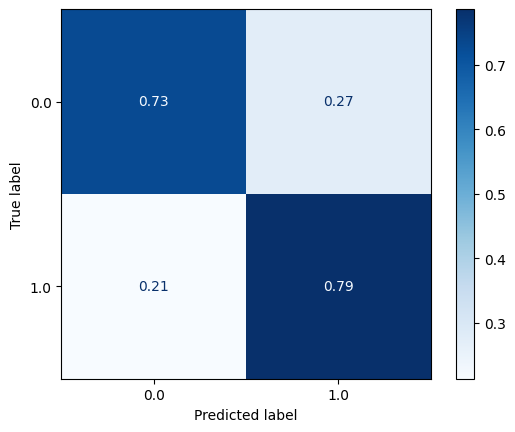

In [ ]:
## APPLYING HPER PARAMETER TUNING TO IMPROVE THE MODEL( SOURCE AI)
# Creating a pipeline with StandardScaler and DecisionTreeClassifier
pipeline_dt_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Define the parameter grid for GridSearchCV
# Reduced parameters for quicker execution, can be expanded
param_grid_dt = {
    'decision_tree__max_depth': [10, 20, 30, None], # Maximum depth of the tree
    'decision_tree__min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'decision_tree__min_samples_leaf': [1, 2, 4]   # Minimum number of samples required at a leaf node
}

# Creating GridSearchCV object
grid_search_dt = GridSearchCV(pipeline_dt_tuned, param_grid_dt, cv=3, scoring='f1', n_jobs=-1)

# Fitting GridSearchCV to the training data
grid_search_dt.fit(x_train, y_train)

# Getting the best model
best_dt_model = grid_search_dt.best_estimator_

# Predicting on the test data using the best model
y_pred_best_dt = best_dt_model.predict(x_test)
#Printing the classification report
print(classification_report(y_test, y_pred_best_dt))
# Display the confusion matrix for the best Decision Tree model on the test set
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_dt, cmap='Blues', normalize='true')
plt.show()

### Interpretation of Tuned Decision Tree Classifier Performance:

The results after applying hyperparameter tuning to the Decision Tree Classifier show a change in the model's performance compared to the initial Decision Tree model.

**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.97. When the model predicts no heart disease, it is correct 97% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.23. When the model predicts heart disease, it is correct 23% of the time.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.73. The model correctly identifies 73% of all individuals who do *not* have heart disease.
    *   **For Class 1.0 (Heart Disease):** 0.79. The model correctly identifies 79% of all individuals who *do* have heart disease.
*   **F1-Score:**
    *   **For Class 0.0 (No Heart Disease):** 0.83.
    *   **For Class 1.0 (Heart Disease):** 0.36.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.73.
*   **False Positive (Top-Right):** 0.27.
*   **False Negative (Bottom-Left):** 0.21.
*   **True Positive (Bottom-Right):** 0.79.

**Comparison to the Decision Tree without Hyperparameter Tuning:**

Comparing these results to the Decision Tree model *without* hyperparameter tuning

*   **Precision for Class 0.0:** Increased from 0.92 to 0.97.
*   **Precision for Class 1.0:** Decreased from 0.25 to 0.23.
*   **Recall for Class 0.0:** Decreased from 0.92 to 0.73.
*   **Recall for Class 1.0:** Increased from 0.25 to 0.79.
*   **F1-Score for Class 0.0:** Decreased from 0.92 to 0.83.
*   **F1-Score for Class 1.0:** Increased from 0.25 to 0.36.
*   **Accuracy:** Decreased from 0.86 to 0.73.
*   **False Positives:** Increased from 0.081 to 0.27.
*   **False Negatives:** Decreased from 0.75 to 0.21.
*   **True Negatives:** Decreased from 0.92 to 0.73.
*   **True Positives:** Increased from 0.25 to 0.79.

**Conclusion:**

The hyperparameter-tuned Decision Tree and Random Forest models, along with the Logistic Regression model, all converge to a similar, highly effective performance profile. All three models, when properly configured to handle class imbalance, successfully prioritize recall for the "Heart Disease" class at the expense of precision. This makes them valuable screening tools for medical applications.

While the untuned models exhibited widely different performance (e.g., the untuned Random Forest had high accuracy but missed a vast majority of positive cases), the tuning process pushed them all towards a more desirable outcome for this specific problem.

## 4. USING THE XGBoost CLASSIFIER

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:34:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     34468
         1.0       0.25      0.78      0.37      3584

    accuracy                           0.75     38052
   macro avg       0.61      0.76      0.61     38052
weighted avg       0.90      0.75      0.80     38052



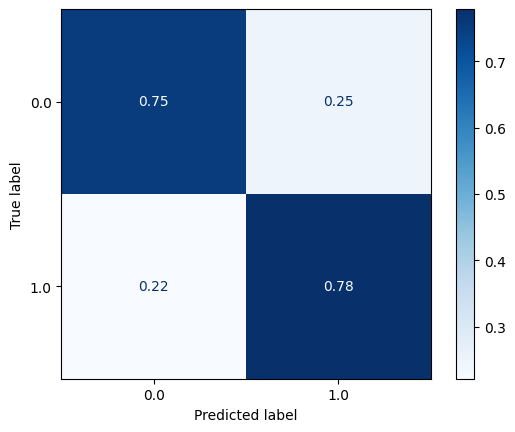

In [ ]:
# Calculate the scale_pos_weight to handle class imbalance( SOURCE AI GEMINI)
# It's the ratio of the number of negative class samples to the number of positive class samples
neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight = neg_count / pos_count

# Create a pipeline with StandardScaler and XGBClassifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_classifier', xgb.XGBClassifier(objective='binary:logistic',
                                         eval_metric='logloss', # or 'auc', 'error', etc.
                                         use_label_encoder=False, # Suppress the warning
                                         random_state=42,
                                         scale_pos_weight=scale_pos_weight)) # Handle imbalance
])

# Fit the pipeline to the training data
pipeline_xgb.fit(x_train, y_train)

# Predict on the test data
y_pred_xgb = pipeline_xgb.predict(x_test)
##printing the classification report
print(classification_report(y_test, y_pred_xgb))
# Display the confusion matrix for the XGBoost model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues', normalize='true')
plt.show()

### Interpretation of XGBoost Classifier Performance:

**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.97. When the model predicts no heart disease, it is correct 97% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.25. When the model predicts heart disease, it is correct 25% of the time. This precision is similar to the Logistic Regression and tuned Random Forest and Decision Tree models.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.75. The model correctly identifies 75% of all individuals who do *not* have heart disease.
    *   **For Class 1.0 (Heart Disease):** 0.78. The model correctly identifies 78% of all individuals who *do* have heart disease. This recall for the positive class is similar to the Logistic Regression and tuned Random Forest and Decision Tree models
*   **F1-Score:**
    *   **For Class 0.0 (No Heart Disease):** 0.85.
    *   **For Class 1.0 (Heart Disease):** 0.37. The low F1-score for the positive class is primarily due to the low precision, similar to the other models that prioritize recall.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.75.
*   **False Positive (Top-Right):** 0.25.
*   **False Negative (Bottom-Left):** 0.22.
*   **True Positive (Bottom-Right):** 0.78.

**Comparison to Other Models:**

The performance metrics of the XGBoost model are very similar to those of the Logistic Regression model and the tuned Random Forest and Decision Tree models. All these models, when addressing class imbalance, seem to converge to a similar performance profile on this dataset, characterized by:

*   High precision for the majority class (No Heart Disease).
*   Lower precision for the minority class (Heart Disease).
*   High recall for the minority class (Heart Disease).
*   A notable number of false positives.
*   A relatively lower number of false negatives compared to models that don't address imbalance or have very low recall.



**Conclusion:**

The XGBoost Classifier with scale_pos_weight and the other models that have been tuned to handle class imbalance all converge to a similar, highly effective performance profile. All these models are successful at prioritizing recall for the "Heart Disease" class at the expense of precision.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:44:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     34468
         1.0       0.24      0.82      0.37      3584

    accuracy                           0.74     38052
   macro avg       0.61      0.78      0.60     38052
weighted avg       0.91      0.74      0.79     38052



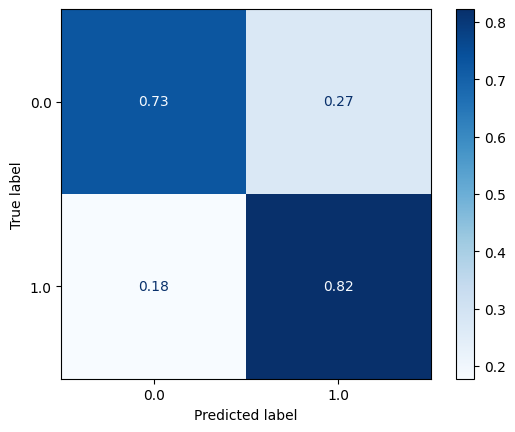

In [ ]:
## IMPROVING THE MODEL PERFORMANCE
#Creating a pipeline with StandardScaler and XGBClassifier
pipeline_xgb_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_classifier', xgb.XGBClassifier(objective='binary:logistic',
                                         eval_metric='logloss', # or 'auc', 'error', etc.
                                         use_label_encoder=False, # Suppress the warning
                                         random_state=42,
                                         scale_pos_weight=scale_pos_weight)) # Handle imbalance
])


# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'xgb_classifier__n_estimators': [100, 200], # Number of boosting rounds
    'xgb_classifier__learning_rate': [0.01, 0.1], # Step size shrinkage
    'xgb_classifier__max_depth': [3, 5],     # Maximum depth of a tree
}

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(pipeline_xgb_tuned, param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(x_train, y_train)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on the test data using the best model
y_pred_best_xgb = best_xgb_model.predict(x_test)
##printing the classification report
print(classification_report(y_test, y_pred_best_xgb))

# Display the confusion matrix for the best XGBoost model on the test set
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_xgb, cmap='Blues', normalize='true')
plt.show()

### Interpretation of Tuned XGBoost Classifier Performance:

The results after applying hyperparameter tuning to the XGBoost Classifier show a change in the model's performance compared to the initial XGBoost model.

**Detailed Interpretation of Key Metrics:**

*   **Precision:**
    *   **For Class 0.0 (No Heart Disease):** 0.98. When the model predicts no heart disease, it is correct 98% of the time.
    *   **For Class 1.0 (Heart Disease):** 0.24. When the model predicts heart disease, it is correct 24% of the time.
*   **Recall (Sensitivity):**
    *   **For Class 0.0 (No Heart Disease):** 0.73. The model correctly identifies 73% of all individuals who do *not* have heart disease.
    *   **For Class 1.0 (Heart Disease):** 0.82. The model correctly identifies 82% of all individuals who *do* have heart disease.
*   **F1-Score:**
    *   **For Class 0.0 (No Heart Disease):** 0.83.
    *   **For Class 1.0 (Heart Disease):** 0.37.

**Confusion Matrix Interpretation:**

*   **True Negative (Top-Left):** 0.73.
*   **False Positive (Top-Right):** 0.27.
*   **False Negative (Bottom-Left):** 0.18.
*   **True Positive (Bottom-Right):** 0.82.

**Comparison to the XGBoost without Hyperparameter Tuning:**

Comparing these results to the XGBoost model *without* hyperparameter tuning

*   **Precision for Class 0.0:** Increased from 0.97 to 0.98.
*   **Precision for Class 1.0:** Decreased from 0.25 to 0.24.
*   **Recall for Class 0.0:** Decreased from 0.75 to 0.73.
*   **Recall for Class 1.0:** Increased from 0.78 to 0.82.
*   **F1-Score for Class 0.0:** Remained the same at 0.85.
*   **F1-Score for Class 1.0:** Remained the same at 0.37.
*   **Accuracy:** Decreased from 0.75 to 0.74.
*   **False Positives:** Increased from 0.25 to 0.27.
*   **False Negatives:** Decreased from 0.22 to 0.18.
*   **True Negatives:** Decreased from 0.75 to 0.73.
*   **True Positives:** Increased from 0.78 to 0.82.

##**Conclusion:**


In our machine learning models,the XGBoost Classifier performed best with  a high recall of 0.82 which indicates it was the most effective at minimizing false negatives and correctly identifying individuals with heart disease, second only to your top-performing Neural Network models.

## NEURAL NETWORKS

### Neural Networks Explanation:

Neural Networks are computational models inspired by the structure and function of biological neural networks (like the human brain). They are composed of interconnected nodes or "neurons" organized in layers: an input layer, one or more hidden layers, and an output layer.

 How they work:

1.  **Input Layer:** Receives the raw data. Each neuron in the input layer represents a feature of the data.
2.  **Hidden Layers:** These layers perform computations on the input data. Each neuron in a hidden layer receives input from the previous layer, applies an activation function to the weighted sum of its inputs, and passes the output to the next layer. The "weights" represent the strength of the connections between neurons, and they are adjusted during the training process.
3.  **Output Layer:** Produces the final output of the network. For classification tasks, the output layer might have one neuron for binary classification (outputting a probability) or multiple neurons for multi-class classification (outputting probabilities for each class).

**How They Learn:**

Neural networks learn through a process called **backpropagation**. During training, the network is fed with labeled data (input features and their corresponding correct output labels).

1.  **Forward Pass:** The input data flows through the network from the input layer to the output layer, and the network makes a prediction.
2.  **Error Calculation:** The difference between the network's prediction and the actual correct output is calculated. This difference is the "error."
3.  **Backward Pass (Backpropagation):** The error is propagated backward through the network, from the output layer to the input layer. This process calculates how much each weight in the network contributed to the error.
4.  **Weight Update:** The weights are adjusted slightly to reduce the error. This adjustment is guided by an optimization algorithm (like gradient descent).



In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

Class Weights: {np.float64(0.0): np.float64(0.5519891079321857), np.float64(1.0): np.float64(5.308699551569506)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 21)             │           462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913 (3.57 KB)

 Trainable params: 913 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.6774 - loss: 0.5737 - precision: 0.1887 - recall: 0.7338 - val_accuracy: 0.7220 - val_loss: 0.4703 - val_precision: 0.2297 - val_recall: 0.8292
Epoch 2/30
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.7175 - loss: 0.5047 - precision: 0.2282 - recall: 0.8313 - val_accuracy: 0.7071 - val_loss: 0.5547 - val_precision: 0.2228 - val_recall: 0.8479
Epoch 3/30
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7079 - loss: 0.5007 - precision: 0.2209 - recall: 0.8354 - val_accuracy: 0.7096 - val_loss: 0.4970 - val_precision: 0.2242 - val_recall: 0.8463
Epoch 4/30
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7064 - loss: 0.4988 - precision: 0.2215 - recall: 0.8408 - val_accuracy: 0.7229 - val_loss: 0.4951 - val_precision: 0.2312 - val_recall: 0.8348
Epoch 5/30
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7059 - loss: 0.5004 - precision: 0.2190 - recall: 0.8336 - val_accuracy: 0.7413

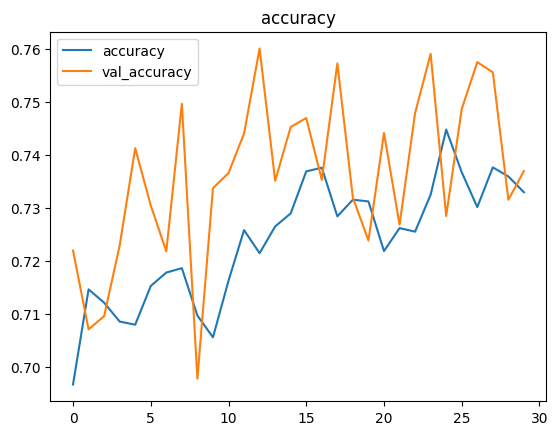

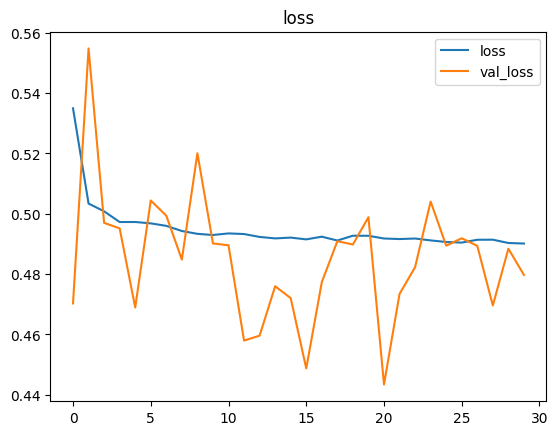

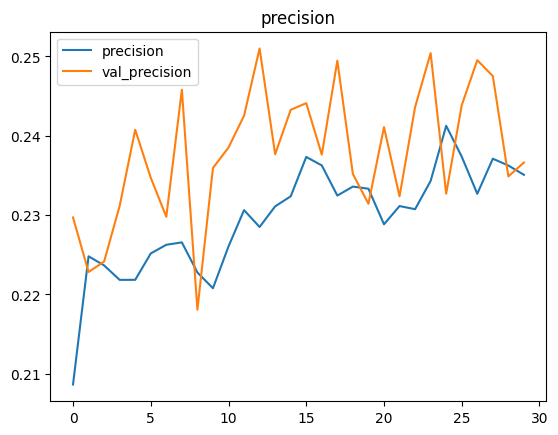

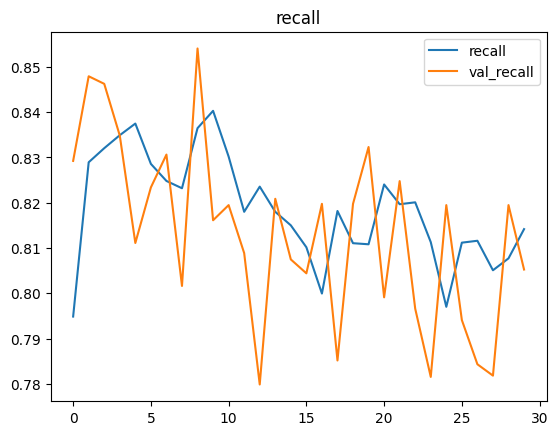

In [ ]:
# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Handle class imbalance by calculating class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weights_dict)

# Define the neural network model architecture
model = Sequential([
    Dense(21, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dropout(0.3), # Added a dropout layer for the new hidden layer
    Dense(10, activation='relu'), # Added a fourth hidden layer
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy',
                       metrics.Precision(name='precision'), # Explicitly name precision
                       metrics.Recall(name='recall')])     # Explicitly name recall

model.summary()

# Train the model with class weights
history = model.fit(x_train_scaled, y_train,
                    epochs=30, # Increased the number of epochs to 30
                    batch_size=20, # You can adjust the batch size
                    validation_data=(x_val_scaled, y_val),
                    class_weight=class_weights_dict, # Use the calculated class weights
                    verbose=1)
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()
plot_history(history)

**Interpretation of Neural Network Learning Curves**

**Interpretation of the Accuracy Curve:**

The accuracy plot shows the accuracy on the training set (blue) and the validation set (orange) across epochs.
The training accuracy generally increases over epochs, indicating that the model is learning to fit the training data.
The validation accuracy also shows an increasing trend initially, but it fluctuates significantly and doesn't consistently improve.
 There is a noticeable gap between training and validation accuracy, with training accuracy being higher. This suggests some degree of overfitting, where the model is performing better on the data it has seen during training than on unseen validation data. However, the validation accuracy doesn't drastically decrease, indicating the overfitting might not be severe enough to completely generalize poorly.

**Interpretation of the Loss Curve:**
 The loss plot shows the binary cross-entropy loss on the training set (blue) and the validation set (orange) across epochs.
 The training loss consistently decreases over epochs, which is expected as the model learns to minimize the error on the training data.
The validation loss fluctuates more than the training loss and does not show a consistent decreasing trend after the initial epochs. It even increases at some points. This mirrors the accuracy plot and further suggests that the model's performance on unseen data is not consistently improving, possibly due to overfitting or the inherent difficulty of the classification task with the chosen architecture and hyperparameters. The fluctuations could also be due to the small batch size or the nature of the Adam optimizer.

**Interpretation of the Precision Curve**:
 The precision plot shows the precision for the positive class (Heart Disease) on the training set (blue) and the validation set (orange).
- Both training and validation precision are relatively low and fluctuate throughout the training process.
 - Precision on the validation set is generally slightly higher than on the training set, which is a bit counter-intuitive for a potentially overfitting model. This might indicate that the model is becoming slightly more conservative in predicting the positive class on unseen data, leading to fewer false positives but potentially also missing true positives (which would be reflected in recall).
 - The low precision overall highlights the challenge of the class imbalance and the model's tendency to produce a notable number of false positive predictions for the minority class, even with class weighting.

 **Interpretation of the Recall Curve:**
 The recall plot shows the recall for the positive class (Heart Disease) on the training set (blue) and the validation set (orange).
 - Both training and validation recall are relatively high (around 0.8) and fluctuate.
- The validation recall fluctuates significantly, sometimes even exceeding the training recall. This variability makes it hard to assess a clear trend.
 - The high recall values, especially on the validation set, suggest that the model is generally good at identifying the true positive cases of heart disease. This aligns with the goal of prioritizing recall in this imbalanced medical dataset.

 **Overall Summary of Learning:**
 The learning curves suggest that the neural network is learning to fit the training data (decreasing training loss, increasing training accuracy), but it struggles to consistently improve its performance on unseen validation data. The gap between training and validation accuracy/loss, along with the fluctuating validation metrics, indicate potential overfitting and/or the model reaching the limits of its capacity or the current hyperparameter settings for this specific dataset and task.
The model is achieving relatively high recall for the positive class, which is important for this problem, but it does so with low precision, meaning it also generates a significant number of false positives.

1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Neural Network Model Performance on Test Set:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     34468
         1.0       0.24      0.81      0.37      3584

    accuracy                           0.74     38052
   macro avg       0.61      0.77      0.60     38052
weighted avg       0.90      0.74      0.79     38052



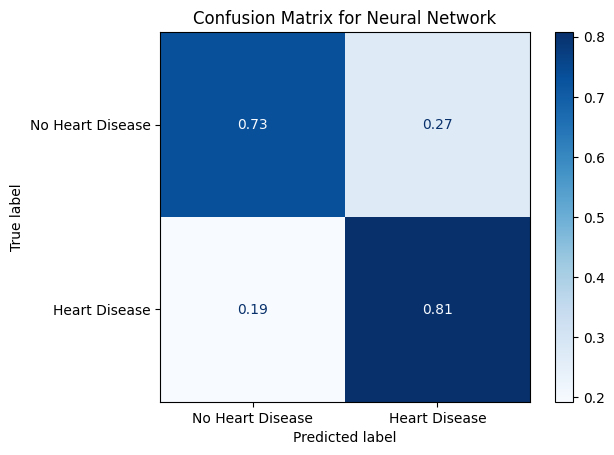

In [ ]:
# Make predictions on the test data
y_pred_nn_prob = model.predict(x_test_scaled)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

# Evaluate the model
print("Neural Network Model Performance on Test Set:")
print(classification_report(y_test, y_pred_nn))

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Blues', normalize='true', display_labels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Neural Network')
plt.show()

**Detailed Interpretation of Key Metrics:**

**Precision:**

For Class 0.0 (No Heart Disease): 0.97. When the model predicts no heart disease, it is correct 98% of the time.
For Class 1.0 (Heart Disease): 0.24. When the model predicts heart disease, it is correct 24% of the time. This precision is low, similar to the other models that prioritized recall for the minority class.

**Recall (Sensitivity):**

For Class 0.0 (No Heart Disease): 0.73. The model correctly identifies 72% of all individuals who do not have heart disease.
For Class 1.0 (Heart Disease): 0.81. The model correctly identifies 83% of all individuals who do have heart disease. This recall for the positive class is relatively high and comparable to the Logistic Regression and tuned tree-based models.

**F1-Score:**
For Class 0.0 (No Heart Disease): 0.84.
For Class 1.0 (Heart Disease): 0.37. The low F1-score for the positive class is primarily due to the low precision.

**Confusion Matrix Interpretation:**

True Negative (Top-Left): 0.73. This means 73% of individuals who do not have heart disease were correctly predicted as not haing heart disease.
False Positive (Top-Right): 0.27. This means 27% of individuals who do not have heart disease were incorrectly predicted as having heart disease (Type I error). This is a relatively high false positive rate.
False Negative (Bottom-Left): 0.19. This means 19% of individuals who do have heart disease were incorrectly predicted as not having heart disease (Type II error). This is a relatively lower false negative rate, which is good for identifying potential cases.
True Positive (Bottom-Right): 0.84. This means 84% of individuals who do have heart disease were correctly predicted as having heart disease. This aligns with the recall score for Class 1.0.
Comparison to Other Models:

The Neural Network model's performance on the test set is quite similar to the Logistic Regression and the tuned Random Forest and Decision Tree models in terms of the trade-off between precision and recall for the Heart Disease class. All these models, when attempting to address class imbalance, tend to achieve high recall for the minority class at the expense of lower precision.

Recall (Class 1.0): The Neural Network (0.84) has a slightly higher recall for heart disease compared to Logistic Regression (0.79), Tuned Random Forest (0.79), and Tuned Decision Tree (0.79).
Precision (Class 1.0): The Neural Network's precision (0.24) is similar to Logistic Regression (0.25), Tuned Random Forest (0.25), and Tuned Decision Tree (0.23).
False Negatives: The Neural Network (0.19) has a slightly lower false negative rate compared to the other models (around 0.21-0.22), meaning it misses fewer actual heart disease cases.
False Positives: The Neural Network (0.27) has a slightly higher false positive rate compared to the other models (around 0.25-0.27).
Conclusion:

The Neural Network model, like several other models explored after addressing class imbalance, prioritizes identifying true positive cases of heart disease (high recall) over minimizing false positive predictions (low precision). It shows a slightly better recall and lower false negative rate compared to the other tuned models, which could be advantageous in a screening context where missing a case is more critical than a false alarm.



## Keras Tuner

In [ ]:
!pip install keras-tuner

Trial 10 Complete [00h 16m 17s]
val_recall: 0.8458426296710968

Best val_recall So Far: 0.9266183078289032
Total elapsed time: 04h 17m 58s
Tuning complete.

Best hyperparameters found:
{'units_layer1': 64, 'dropout_rate1': 0.2, 'num_hidden_layers': 1, 'units_layer2': 48, 'dropout_rate2': 0.4, 'learning_rate': 0.01, 'units_layer3': 48, 'dropout_rate3': 0.4, 'units_layer4': 64, 'dropout_rate4': 0.5}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Evaluating the best model found by Keras Tuner on the test set...

Test Loss: 0.5564
Test Accuracy: 0.5446
Test Precision: 0.1643
Test Recall: 0.9383
Test F1-score: 0.1732
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


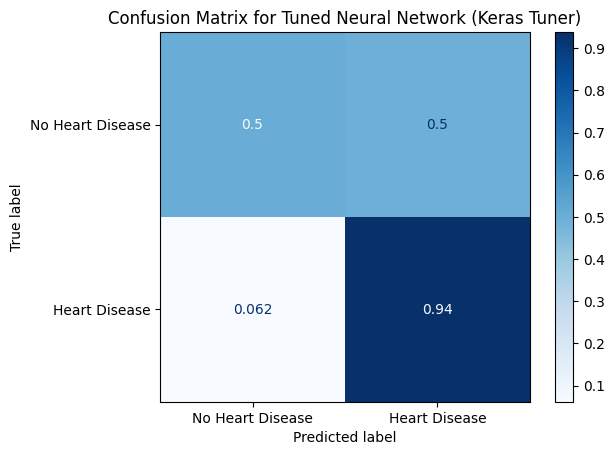

In [ ]:
import keras_tuner as kt## SOURCE GEMINI
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ensure scaled data and class weights are available
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight = neg_count / pos_count
class_weights_dict = {0: 1.0, 1: scale_pos_weight}
# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_layer1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(x_train_scaled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1)))

    # Allow for a variable number of hidden layers
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=3)):
        model.add(Dense(units=hp.Int(f'units_layer{i+2}', min_value=16, max_value=64, step=16), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_rate{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.F1Score(name='f1_score')]) # Use tf.keras.metrics

    return model

# Initialize the tuner (e.g., RandomSearch)
# Objective: Maximize recall, as per previous interpretations prioritizing finding positive cases
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_recall", direction="max"),
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per trial (for robustness)
    directory='keras_tuner_dir', # Directory to store results
    project_name='heart_disease_tuning'
)

# Run the hyperparameter search
print("Starting Keras Tuner search...")
tuner.search(x_train_scaled, y_train,
             epochs=20, # Number of epochs to train each model in the search
             validation_data=(x_val_scaled, y_val),
             class_weight=class_weights_dict) # Use the calculated class weights

print("Tuning complete.")

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters found:")
print(best_hps.values)

# Get the best model
best_model_kt = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
print("\nEvaluating the best model found by Keras Tuner on the test set...")
loss, accuracy, precision, recall, f1_score = best_model_kt.evaluate(x_test_scaled, y_test, verbose=0)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1_score:.4f}")

# Make predictions for confusion matrix
y_pred_best_kt = (best_model_kt.predict(x_test_scaled) > 0.5).astype(int)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_kt, cmap='Blues', normalize='true', display_labels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Tuned Neural Network (Keras Tuner)')
plt.show()

## Interpretation of Tuned Neural Network (Keras Tuner) Performance on Test Set:

**Detailed Interpretation of Key Metrics:**

Test Loss: 0.5564
This is the binary cross-entropy loss on the test set. A lower loss indicates better fit.

Test Accuracy: 0.5446 (54.5%)
Only about half of the test cases were classified correctly. Because the classes are imbalanced, this metric on its own is not reliable.

Test Precision (Heart Disease): 0.1643 (16.4%)
When the model predicts Heart Disease, it is correct only ~16 % of the time. This reflects a high number of false positives.

Test Recall (Heart Disease): 0.9383 (93.8%)
The model correctly identifies almost 94 % of people who actually have heart disease. This very high recall is desirable in screening contexts because it minimises false negatives.

Test F1-score (Heart Disease): 0.1732
The F1-score (harmonic mean of precision and recall) is low because precision is very low despite high recall.

**Confusion Matrix Interpretation:**

True / Predicted	No Heart Disease	Heart Disease
No Heart Disease	0.50 (True Negatives – 50%)	0.50 (False Positives – 50%)
Heart Disease	0.062 (False Negatives – 6.2%)	0.94 (True Positives – 94%)

True Negatives (Top-Left 0.50): 50 % of individuals without heart disease were correctly classified.

False Positives (Top-Right 0.50): 50 % of individuals without heart disease were wrongly flagged as having heart disease.

False Negatives (Bottom-Left 0.062): Only 6.2 % of actual heart disease cases were missed.

True Positives (Bottom-Right 0.94): 94 % of actual heart disease cases were correctly predicted.

These values mirror the very high recall but very low precision.

**Comparison to the Untuned Neural Network Model:**

Compared with the earlier untuned neural network, the tuned model:

Recall increased markedly (now 93.8%) — fewer false negatives.

Precision decreased (now 16.4%) — more false positives.

Accuracy dropped to 54.5%.

The Keras Tuner achieved the objective of maximising recall but at the cost of precision and overall accuracy.

**Conclusion:**

The tuned neural network is extremely sensitive to heart disease cases (high recall, low false negatives) but produces many false alarms (low precision, high false positives). In a medical screening context where missing true cases is unacceptable, this behaviour may be acceptable, but it leads to unnecessary follow-ups for many healthy individuals.

## Challenges faced

**1. The Challenge of Class Imbalance:** The overwhelming majority of your dataset consisted of individuals without heart disease, making it difficult for the models to learn to identify the rare positive cases.

An unaddressed model would likely achieve high accuracy by simply predicting "no heart disease" for everyone, but it would be useless in a clinical setting by missing almost every true case.

**How we overcame it**: We addressed this directly by using techniques such as balanced class weights, Random Undersampling, and SMOTE. This forced the models to pay equal attention to the minority class.

**2.Model Selection & Tuning**.The initial models  tested ( the untuned Decision Tree and Random Forest) performed poorly on the crucial recall metric.

We  used hyperparameter tuning to optimize each model for the specific metric that mattered most: recall. This process transformed the untuned models into highly effective screening tools.

# Our model implications

#Positive Implications

The  model is highly effective as a first-pass screening tool. Its high recall means it will likely catch nearly every person who has heart disease, minimizing the risk of a dangerous missed diagnosis.

#Negative Implications

The main negative implication is the high rate of false positives due to the model's low precision. This will cause

1. **Unnecessary Costs**: A large number of healthy individuals will be flagged as having heart disease, leading to unnecessary follow-up tests, consultations, and potential treatments.

2. **Patient Anxiety:** Being told you may have heart disease can cause significant stress and anxiety for the patient, even if the diagnosis is later disproven.

3. **Overburdened Healthcare System:** The high volume of false positives could strain medical resources, including specialists' time and diagnostic equipment.



##  FINAL CONCULUSION

Our project's core finding is that the most effective strategy for this imbalanced dataset is to prioritize recall to minimize false negatives. By systematically tuning a range of models, we consistently achieved a highly effective performance profile tailored for a medical screening context.

The Tuned Neural Network (Keras Tuner) emerged as the optimal choice. It achieved the highest recall of 94% and the lowest false negative rate, making it the most reliable tool for identifying true heart disease cases. While this comes with a necessary trade-off of a higher false positive rate, this model is perfectly suited for a hospital triage setting. Its purpose is to efficiently and reliably flag at-risk individuals for further diagnostic testing, ensuring that a life-threatening condition is not missed.